# Josh Bielenberg EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/Josh/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("tedTalksFlattened.csv", index_col = 'Unnamed: 0')
df['event'] = df['event'].apply(str)

# Distribution of views

In [3]:
df['views'].describe()

count    2.447000e+03
mean     1.725715e+06
std      2.538438e+06
min      6.666800e+04
25%      7.634800e+05
50%      1.134737e+06
75%      1.720995e+06
max      4.722711e+07
Name: views, dtype: float64

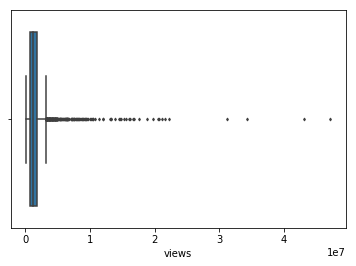

In [4]:
plt.show(sns.boxplot(x='views',data=df, fliersize=2))

Note that there is multiple extreme large outliers. However, there is so many that it doesn't make sense to ignore them. Rather, we investigate them. 

In [5]:
outlierValue = df['views'].quantile(.75) + (df['views'].quantile(.75)-df['views'].quantile(.25))*1.5
outliers = df[df['views'] > outlierValue]
notOutliers = df[df['views'] <= outlierValue]
outliers

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,id,relatedIds
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,7346,10581,300,10704,4439,1174,209,24924,66,"[865, 1738, 2276, 892, 1232, 2616]"
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,443,132,258,268,116,203,131,413,1,"[243, 547, 2093, 2784, 2339, 2331]"
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,5433,4606,67,2542,3736,248,61,2893,92,"[2056, 2296, 620, 974, 140, 912]"
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,...,1038,1350,377,2423,669,441,335,5211,96,"[229, 70, 97, 1094, 2861, 2279]"
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,...,226,316,225,311,61,308,290,438,86,"[22, 94, 856, 112, 71, 308]"
13,242,"Jeff Han shows off a cheap, scalable multi-tou...",527,TED2006,1139184000,27,Jeff Han,Jeff Han: The radical promise of the multi-tou...,1,1154391060,...,461,919,32,77,4643,188,23,471,65,"[685, 872, 1984, 2410, 260, 230]"
20,185,Performer and web toymaker Ze Frank delivers a...,1136,TED2004,1077580800,26,Ze Frank,Ze Frank: Nerdcore comedy,1,1156464660,...,61,177,137,20,80,450,239,196,87,"[148, 981, 2049, 2792, 1152, 2838]"
22,556,Anthropologist Helen Fisher takes on a tricky ...,1407,TED2006,1140739200,33,Helen Fisher,"Helen Fisher: Why we love, why we cheat",1,1157501460,...,2591,2106,249,1513,207,394,111,1083,16,"[307, 374, 1669, 2590, 2661, 2330]"
27,355,"""Tipping Point"" author Malcolm Gladwell gets i...",1050,TED2004,1077753600,37,Malcolm Gladwell,"Malcolm Gladwell: Choice, happiness and spaghe...",1,1158624660,...,2004,2082,115,1014,290,361,51,1276,20,"[93, 28, 1831, 263, 1306, 765]"
28,970,"Dan Gilbert, author of ""Stumbling on Happiness...",1276,TED2004,1075680000,43,Dan Gilbert,Dan Gilbert: The surprising science of happiness,1,1159229460,...,3899,4303,174,2355,1047,439,67,3554,97,"[944, 1880, 2162, 1607, 570, 779]"


In [6]:
outliers['views'].describe()

count    2.390000e+02
mean     6.799695e+06
std      5.833201e+06
min      3.157446e+06
25%      3.807926e+06
50%      4.642478e+06
75%      7.402527e+06
max      4.722711e+07
Name: views, dtype: float64

If we use views as our primary indicator of success, then these would be considered the 239 most succesful Ted Talks. We can now compare multiple attributes from the outliers to nonOutlier talks.

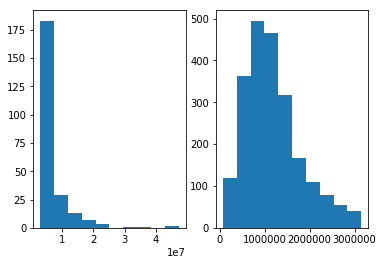

In [7]:
plt.subplot(1,2,1)
plt.hist(outliers['views'])
plt.subplot(1,2,2)
plt.hist(notOutliers['views'])
plt.show()

Here we show which TED events had the most outliers talks given, and below we show which TED events had the most not-outliers talks given.

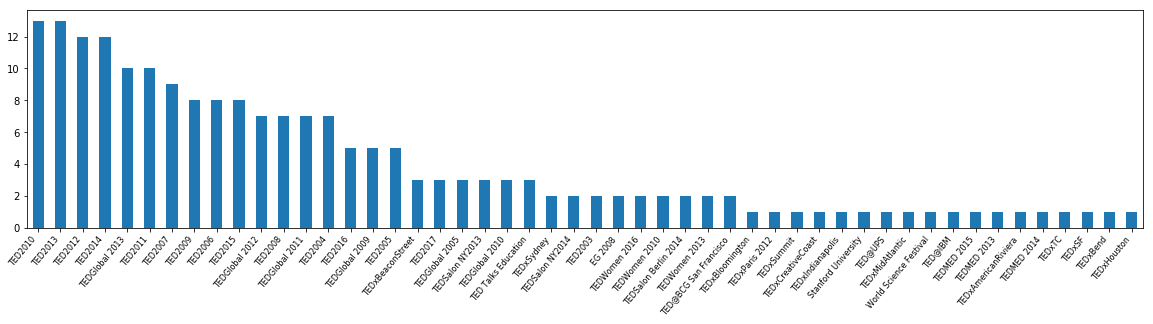

In [26]:
plt.figure(figsize=(20,4))
barPlot = outliers['event'].value_counts().head(50).plot(kind="bar")#sns.barplot(x='event',data=outliers)
barPlot.set_xticklabels(barPlot.get_xticklabels(), rotation=50, ha="right", fontsize=8)
plt.show(barPlot)

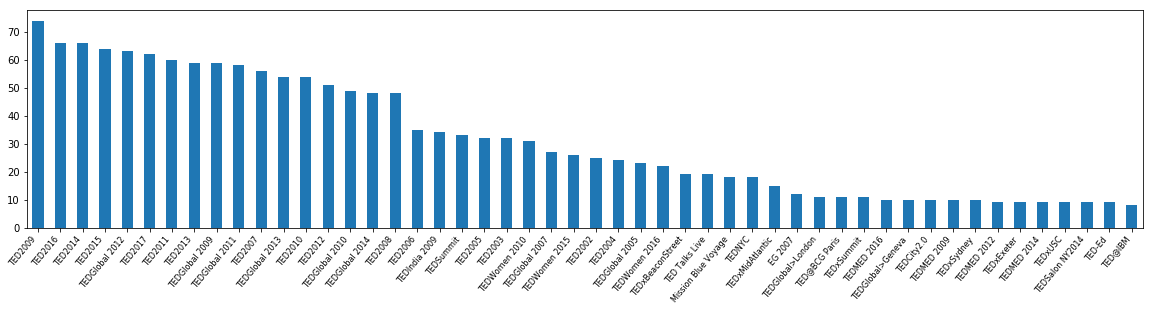

In [27]:
plt.figure(figsize=(20,4))
barPlot = notOutliers['event'].value_counts().head(50).plot(kind="bar")#sns.barplot(x='event',data=outliers)
barPlot.set_xticklabels(barPlot.get_xticklabels(), rotation=50, ha="right", fontsize=8)
plt.show(barPlot)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 33 columns):
comments              2447 non-null int64
description           2447 non-null object
duration              2447 non-null int64
event                 2447 non-null object
film_date             2447 non-null int64
languages             2447 non-null int64
main_speaker          2447 non-null object
name                  2447 non-null object
num_speaker           2447 non-null int64
published_date        2447 non-null int64
ratings               2447 non-null object
related_talks         2447 non-null object
speaker_occupation    2443 non-null object
tags                  2447 non-null object
title                 2447 non-null object
url                   2447 non-null object
views                 2447 non-null int64
Funny                 2447 non-null int64
Beautiful             2447 non-null int64
Ingenious             2447 non-null int64
Courageous            2447 non-null int64
L